<a href="https://colab.research.google.com/github/ybenbrai/covid/blob/master/Copy_of_Image_remover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# !unzip images.zip -d /content/images/

In [7]:
import glob
import os

current_path = os.getcwd()
txt = glob.glob('*txt')[0]
image_links = []
with open(txt,"r") as f:
    image_links = f.read().splitlines()
len(image_links)

3810

In [8]:
!pip install keras_ocr

import matplotlib.pyplot as plt
from pandas import DataFrame
import keras_ocr
import cv2
import math
import numpy as np
import os

def midpoint(x1, y1, x2, y2):
    x_mid = int((x1 + x2)/2)
    y_mid = int((y1 + y2)/2)
    return (x_mid, y_mid)
pipeline = keras_ocr.pipeline.Pipeline()
def inpaint_text(img_path, pipeline):
    # read image
    img = keras_ocr.tools.read(img_path)
    # generate (word, box) tuples 
    prediction_groups = pipeline.recognize([img])
    mask = np.zeros(img.shape[:2], dtype="uint8")
    for box in prediction_groups[0]:
        x0, y0 = box[1][0]
        x1, y1 = box[1][1] 
        x2, y2 = box[1][2]
        x3, y3 = box[1][3] 
        
        x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
        x_mid1, y_mi1 = midpoint(x0, y0, x3, y3)
        
        thickness = int(math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))
        
        cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mi1), 255,    
        thickness)
        img = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)
                 
    return(img)

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


## Get and manipulate images

In [9]:
import requests
import shutil

if os.path.exists("/content/output"):
    shutil.rmtree("/content/output")
os.mkdir("/content/output")

for index,url in enumerate(image_links):
  print(f'Processed images ({index+1}/{len(image_links)})')
  # Getting images
  img_content = requests.get(url)
  # Outputing images
  img = inpaint_text(url, pipeline)
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  base = url.split('/')[4].split('.')[0]

  cv2.imwrite("/content/output/"+base+".png", img_rgb)


Processed images (1/3810)
Processed images (2/3810)
Processed images (3/3810)
Processed images (4/3810)
Processed images (5/3810)
Processed images (6/3810)
Processed images (7/3810)
Processed images (8/3810)
Processed images (9/3810)
Processed images (10/3810)
Processed images (11/3810)
Processed images (12/3810)


KeyboardInterrupt: ignored

## Group of images

In [5]:
import glob 
import shutil

links = glob.glob('/content/images/*')

if os.path.exists("/content/output"):
    shutil.rmtree("/content/output")
os.mkdir("/content/output")

for link in links:

  img = inpaint_text(link, pipeline)
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  base = os.path.basename(link)
  base = base.split('.')[0]

  cv2.imwrite("/content/output/"+base+".png", img_rgb)

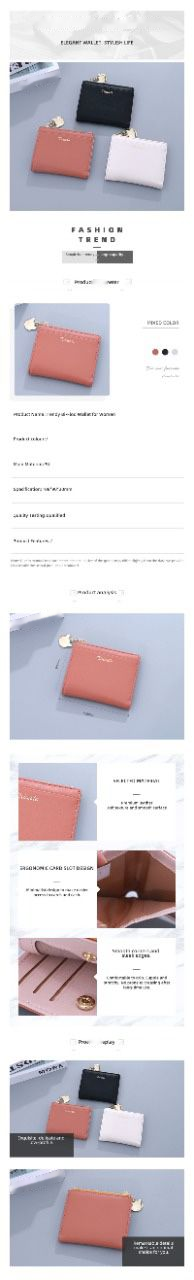

In [ ]:
import random
from google.colab.patches import cv2_imshow
import os
current_path = os.getcwd()
images = glob.glob(f'{current_path}/output/*')
choice = random.choice(images)
img = cv2.imread(choice)
cv2_imshow(img)

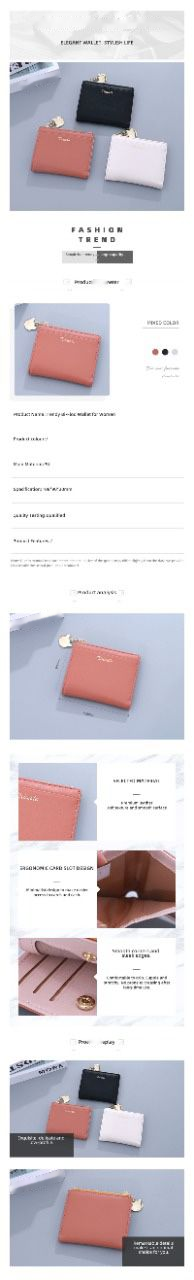

In [ ]:
cv2_imshow(img_rgb)

## One Image

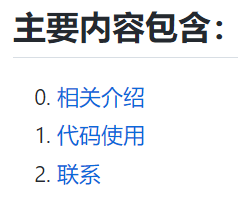

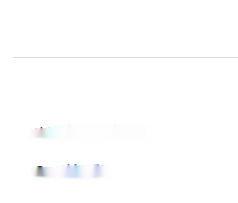

In [ ]:
old_image = cv2.imread('image.png')
img = inpaint_text("image.png", pipeline)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.imwrite("new_image.png", img_rgb)
cv2_imshow(old_image)
cv2_imshow(img_rgb)

## Delete only chinese

In [ ]:
import re 

def check_chinese(text):
  return False if len(re.findall(r'[\u4e00-\u9fff]+', text))==0 else True

In [ ]:
def inpaint_text(img_path, pipeline):
    # read image
    img = keras_ocr.tools.read(img_path)
    # generate (word, box) tuples 
    prediction_groups = pipeline.recognize([img])
    mask = np.zeros(img.shape[:2], dtype="uint8")
    for box in prediction_groups[0]:
        print(box[0])
        if check_chinese(box[0]):
           x0, y0 = box[1][0]
           x1, y1 = box[1][1] 
           x2, y2 = box[1][2]
           x3, y3 = box[1][3] 
        
           x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
           x_mid1, y_mi1 = midpoint(x0, y0, x3, y3)
        
           thickness = int(math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))
        
           cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mi1), 255,    
           thickness)
           img = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)
                 
    return(img)

epfee
exid
o
ttas
1
etes
2


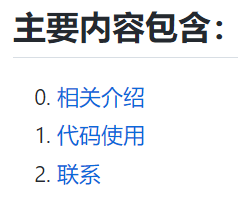

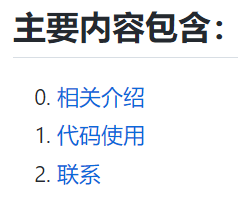

In [ ]:
old_image = cv2.imread('image.png')
img = inpaint_text("image.png", pipeline)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.imwrite("new_image.png", img_rgb)
cv2_imshow(old_image)
cv2_imshow(img_rgb)